# ***HOUSE PRICE PREDICTION***

***DATASET OVERVIEW***

This dataset is designed for predicting house prices based on various features and characteristics of the properties. It comprises 4,600 rows and 18 columns, providing a comprehensive set of attributes for each property. The data can be used to build regression models to estimate house prices and understand the impact of different features on property values.

***COLUMNS DESCRIPTION***

1]**Date :** The date when the house was sold. This feature can be useful for analyzing trends and seasonal effects in housing prices.

2]**Price :** The sale price of the house (target variable). This is the value we aim to predict using the other features.

3]**Bedrooms:** The number of bedrooms in the house. A common feature influencing house prices.

4]**Bathrooms:** The number of bathrooms in the house. This includes both full and partial bathrooms.

5]**Sqft_living:** The total living area of the house in square feet. Larger living areas often correlate with higher prices.

6]**Sqft_lot:** The total lot size in square feet. This represents the size of the property lot and can affect the overall value.

7]**Floors:** The number of floors in the house. Houses with more floors might have different price dynamics.

8]**Waterfront:** A binary indicator (0 or 1) indicating whether the house has a waterfront view. Waterfront properties typically have higher values.

9]**View:** A numerical score representing the quality of the view from the house. This feature can influence pricing depending on the view quality.

10]**Condition:** The condition of the house on a scale (e.g., 1 to 5), reflecting the quality and maintenance level. Better condition usually leads to a higher price.

11]**Sqft_above:** The square footage of the house above ground level. This feature helps differentiate between houses with different basement configurations.

12]**Sqft_basement:** The square footage of the basement. Houses with larger basements might have varying price impacts.

13]**Yr_built:** The year the house was built. Age can influence pricing, with newer homes often commanding higher prices.

14]**Yr_renovated:** The year the house was last renovated. Recent renovations can increase property value.

15]**Street:** The street on which the house is located. This might be less useful for modeling but can provide additional context.

16]**City:** The city where the house is located. Location is a significant factor in determining house prices.

17]**Statezip:** The state and ZIP code of the property. This helps in geographical analysis and segmentation.

18]**Country:** The country where the house is located. This feature helps in understanding the broader geographical context of the data

***DATASET SIZE***

Rows: 4,600

Columns: 18

***POTENTIAL USES***

**Predictive Modeling:** Build and evaluate regression models to predict house prices.

**Exploratory Data Analysis:** Analyze how different features impact house prices and uncover trends and patterns.

**Feature Engineering:** Create new features based on existing ones to enhance model performance.

***IMPORTING LIBRARIES***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error,r2_score


***LOADING DATASET***

In [ ]:
df=pd.read_csv('/content/House price Prediction.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


***Finding Number of Rows and Columns :***

In [ ]:
df.shape

(4600, 18)

***UNDERSTANDING STRUCTURE OF DATASET***

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


***Column Names:***

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

***Summary Of Statistics For Numerical Columns :***

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


***Summary Of Statistics For Categorical Columns :***

In [ ]:
df.describe(include='object')

,date,street,city,statezip,country
count,4600,4600,4600,4600,4600
unique,70,4525,44,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1573,148,4600


***To See Unique Values in Each Column :***

In [ ]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].unique())
    print("*"*100)

Column: date
['2014-05-02 00:00:00' '2014-05-03 00:00:00' '2014-05-04 00:00:00'
 '2014-05-05 00:00:00' '2014-05-06 00:00:00' '2014-05-07 00:00:00'
 '2014-05-08 00:00:00' '2014-05-09 00:00:00' '2014-05-10 00:00:00'
 '2014-05-11 00:00:00' '2014-05-12 00:00:00' '2014-05-13 00:00:00'
 '2014-05-14 00:00:00' '2014-05-15 00:00:00' '2014-05-16 00:00:00'
 '2014-05-17 00:00:00' '2014-05-18 00:00:00' '2014-05-19 00:00:00'
 '2014-05-20 00:00:00' '2014-05-21 00:00:00' '2014-05-22 00:00:00'
 '2014-05-23 00:00:00' '2014-05-24 00:00:00' '2014-05-25 00:00:00'
 '2014-05-26 00:00:00' '2014-05-27 00:00:00' '2014-05-28 00:00:00'
 '2014-05-29 00:00:00' '2014-05-30 00:00:00' '2014-05-31 00:00:00'
 '2014-06-01 00:00:00' '2014-06-02 00:00:00' '2014-06-03 00:00:00'
 '2014-06-04 00:00:00' '2014-06-05 00:00:00' '2014-06-06 00:00:00'
 '2014-06-07 00:00:00' '2014-06-08 00:00:00' '2014-06-09 00:00:00'
 '2014-06-10 00:00:00' '2014-06-11 00:00:00' '2014-06-12 00:00:00'
 '2014-06-13 00:00:00' '2014-06-14 00:00:00' '201

***DATA CLEANING***

***Missing Values***

In [ ]:
df.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


***Data Types Of Columns***

In [ ]:
df.dtypes

,0
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


***Update Renovation Years to Current Year Context***

In [ ]:
for i in df['yr_renovated']:
  if i!=0:
   df['yr_renovated']=df['yr_renovated'].replace(i,2024-i)
df


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,19,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,32,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,45,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,15,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


***State Abbreviation Removal and Conversion to Numeric Format***

In [ ]:
df['statezip']=df['statezip'].str.replace('WA',' ')
df['statezip']=df['statezip'].astype(int)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,19,18810 Densmore Ave N,Shoreline,98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,32,9105 170th Ave NE,Redmond,98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,45,501 N 143rd St,Seattle,98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,15,14855 SE 10th Pl,Bellevue,98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,98178,USA


***DATA VIUALIZATION***

***Regression Plot of House Prices vs. Number of Bedrooms***

<Axes: xlabel='bedrooms', ylabel='price'>

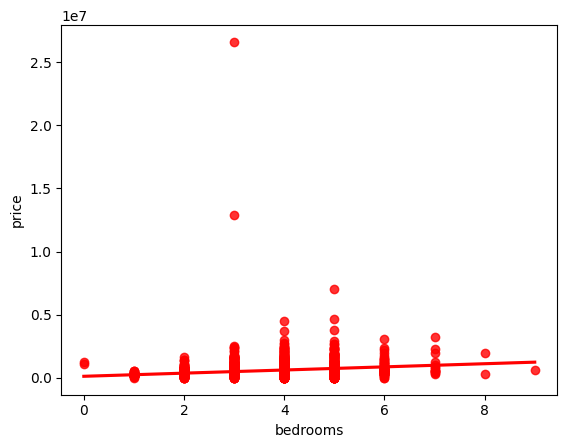

In [ ]:
sns.regplot(x=df['bedrooms'],y=df['price'],color='r')

***Regression Plot of House Prices vs. Number of Bathrooms***

<Axes: xlabel='bathrooms', ylabel='price'>

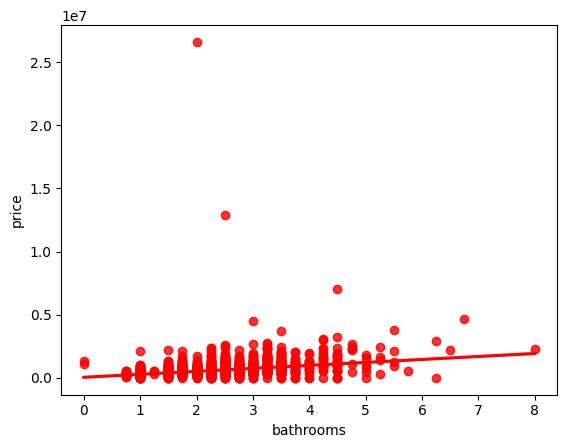

In [ ]:
sns.regplot(x=df['bathrooms'],y=df['price'],color='r')

***Regression Plot of House Prices vs. Number of Floors***

<Axes: xlabel='floors', ylabel='price'>

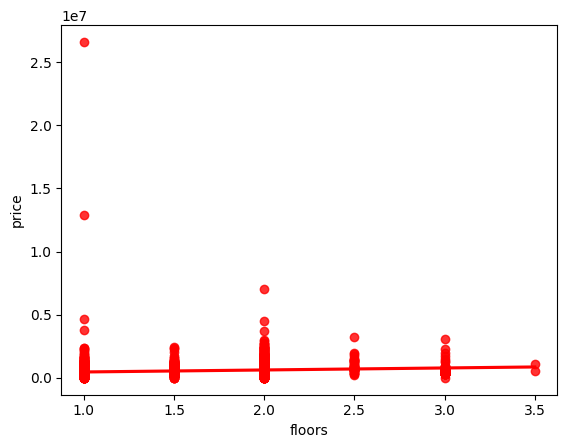

In [ ]:
sns.regplot(x=df['floors'],y=df['price'],color='r')

***Regression Plot of House Prices vs. Condition of Houses***

<Axes: xlabel='condition', ylabel='price'>

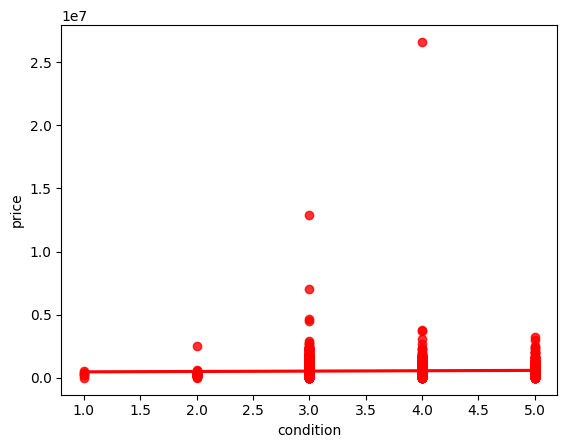

In [ ]:
sns.regplot(x=df['condition'],y=df['price'],color='r')

***Top 10 Most Frequent Street***

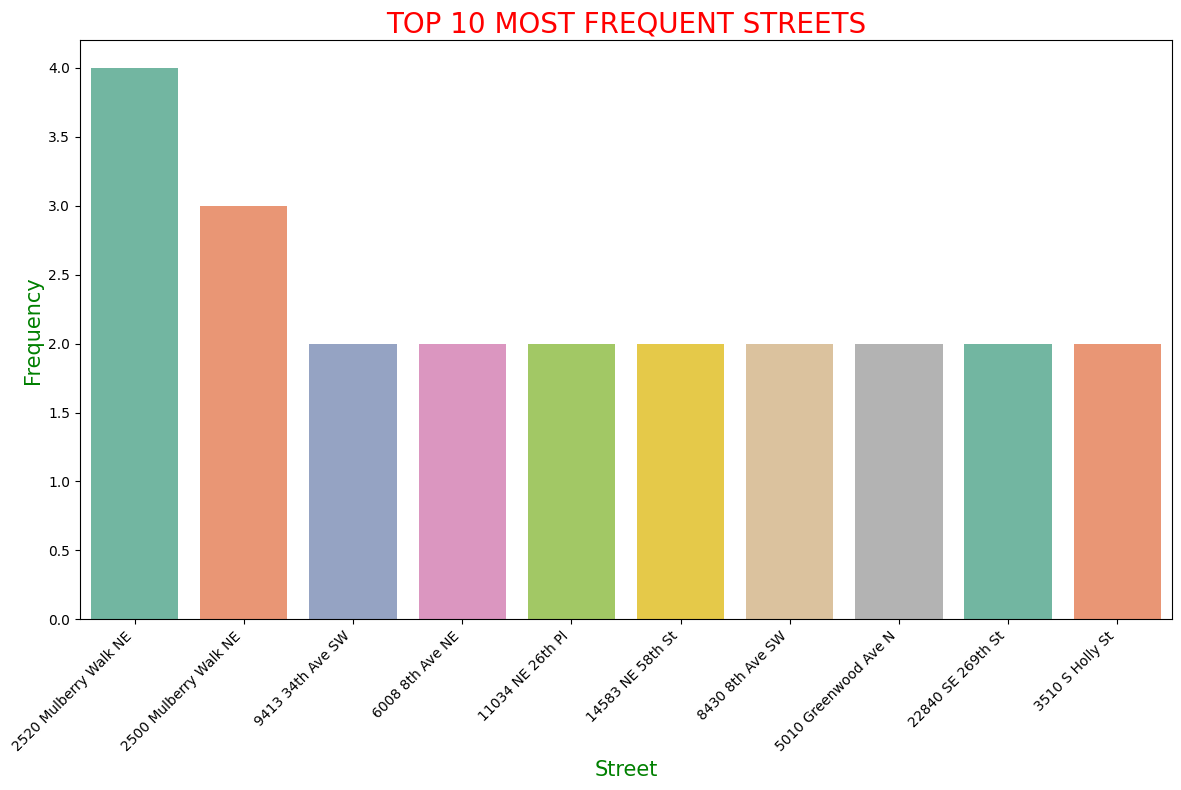

In [ ]:
top_n = 10
top_streets = df['street'].value_counts().head(top_n)
custom_colors = sns.color_palette('Set2', n_colors=top_n)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_streets.index, y=top_streets.values,palette=custom_colors)
plt.xticks(rotation=45, ha='right')
plt.title(f'TOP {top_n} MOST FREQUENT STREETS',color='red',fontsize=20)
plt.xlabel('Street',color='green',fontsize=15)
plt.ylabel('Frequency',color='green',fontsize=15)
plt.tight_layout()
plt.show()

***Top 10 Most Frequent City***

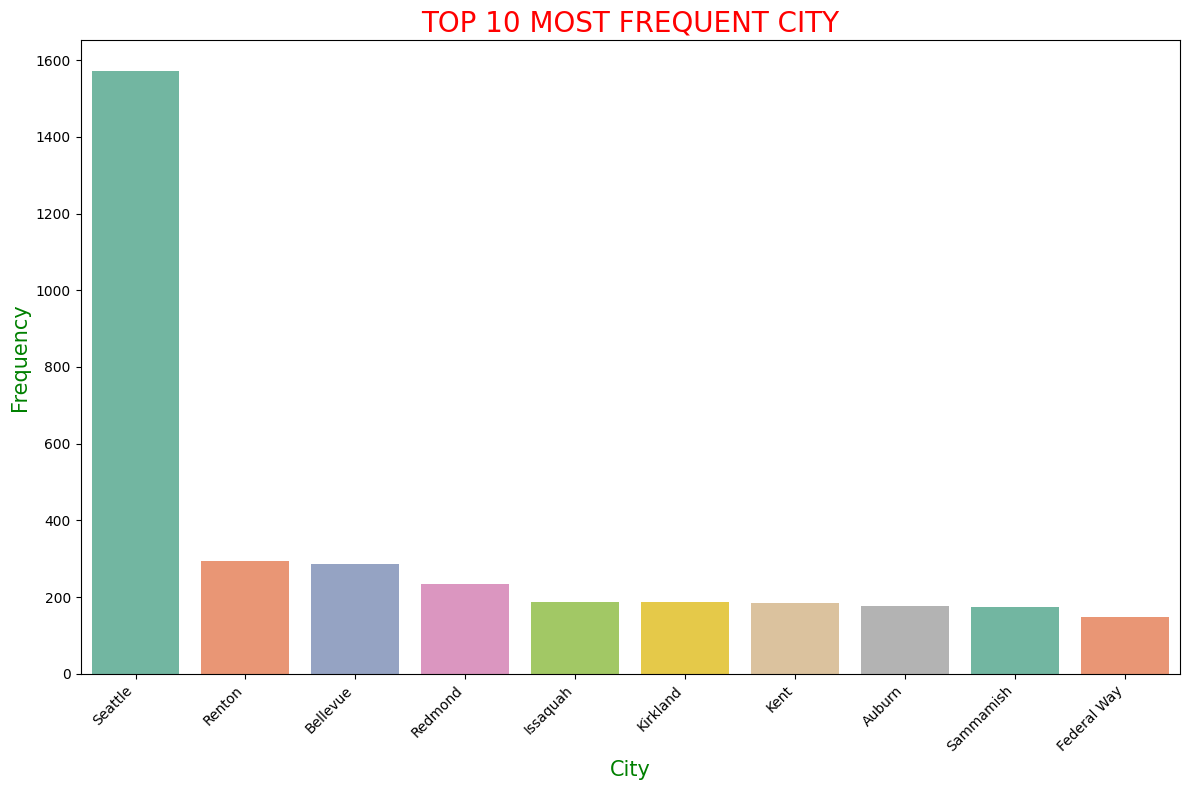

In [ ]:
top_n = 10
top_streets = df['city'].value_counts().head(top_n)
custom_colors = sns.color_palette('Set2', n_colors=top_n)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_streets.index, y=top_streets.values,palette=custom_colors)
plt.xticks(rotation=45, ha='right')
plt.title(f'TOP {top_n} MOST FREQUENT CITY',color='red',fontsize=20)
plt.xlabel('City',color='green',fontsize=15)
plt.ylabel('Frequency',color='green',fontsize=15)
plt.tight_layout()
plt.show()

***Top 10 Most Frequent StateZip***

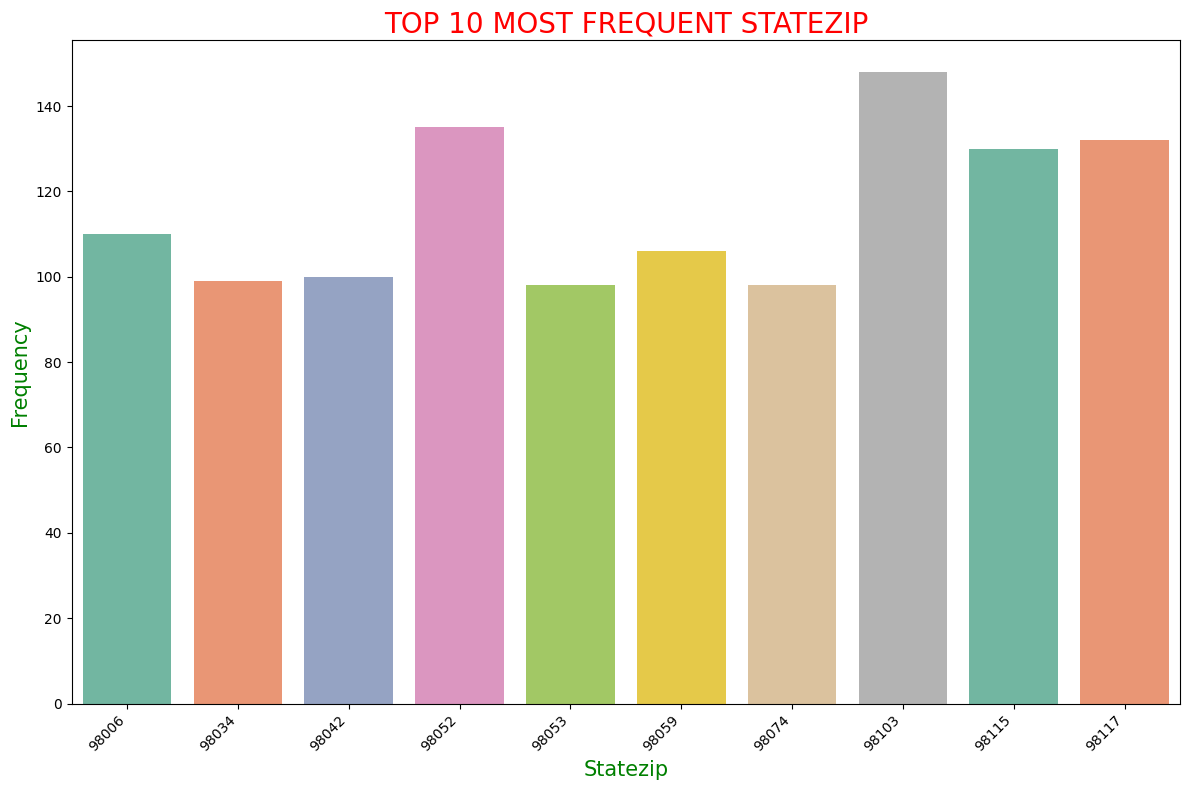

In [ ]:
top_n = 10
top_streets = df['statezip'].value_counts().head(top_n)
custom_colors = sns.color_palette('Set2', n_colors=top_n)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_streets.index, y=top_streets.values,palette=custom_colors)
plt.xticks(rotation=45, ha='right')
plt.title(f'TOP {top_n} MOST FREQUENT STATEZIP',color='red',fontsize=20)
plt.xlabel('Statezip',color='green',fontsize=15)
plt.ylabel('Frequency',color='green',fontsize=15)
plt.tight_layout()
plt.show()

***DATA PREPROCESSING***

***Transformation of Categorical Data to Numeric with LabelEncoder***

In [ ]:
lb=LabelEncoder()
df['street']=lb.fit_transform(df['street'])
df['city']=lb.fit_transform(df['city'])
df['statezip']=lb.fit_transform(df['statezip'])
df['country']=lb.fit_transform(df['country'])


***Preprocess the Date Column***

In [ ]:
df['date'] = pd.to_datetime(df['date'])

***Extract Time Features***

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

In [ ]:
df.drop(['date'],axis=1,inplace=True)

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_built,yr_renovated,street,city,statezip,country,year,month,day,weekday
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,1955,19,1522,36,62,0,2014,5,2,4
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,1921,0,3899,35,58,0,2014,5,2,4
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,1966,0,2291,18,26,0,2014,5,2,4
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,1963,0,4263,3,7,0,2014,5,2,4
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,1976,32,4352,31,31,0,2014,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,1954,45,3447,35,62,0,2014,7,9,2
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,1983,15,960,3,6,0,2014,7,9,2
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,2009,0,4033,32,37,0,2014,7,9,2
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,1974,0,3498,35,71,0,2014,7,10,3


***Heatmap Showing Correlations Between Features***

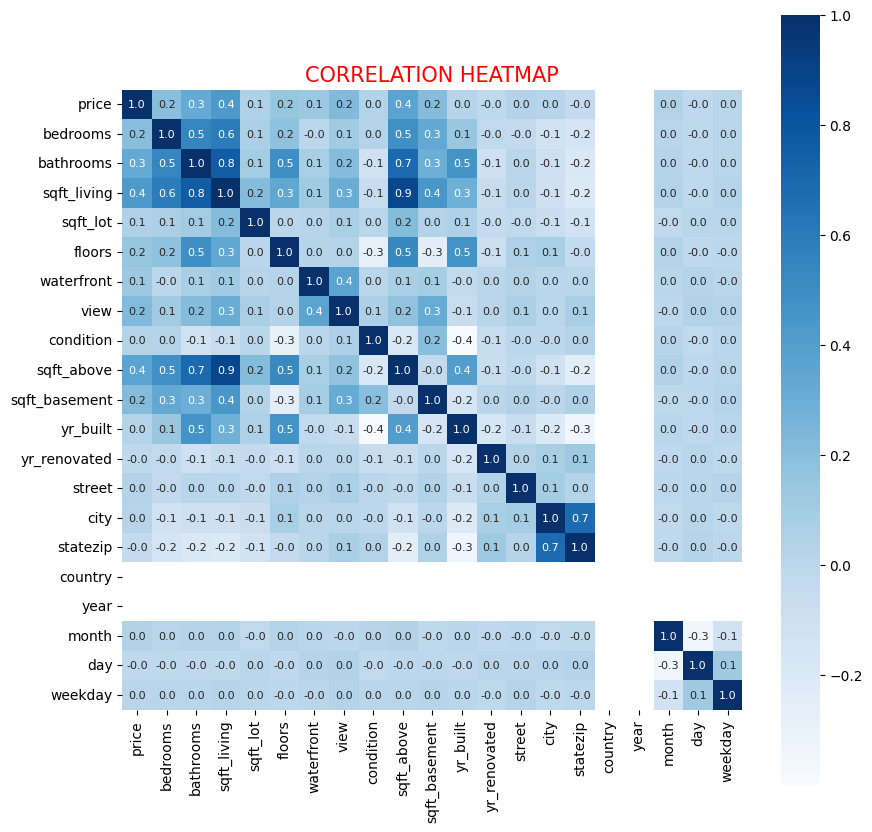

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.title('CORRELATION HEATMAP',color='red',fontsize=15)
plt.show()

***Rolling Average***

The rolling average smooths out short-term fluctuations and shows the underlying trend in housing prices.

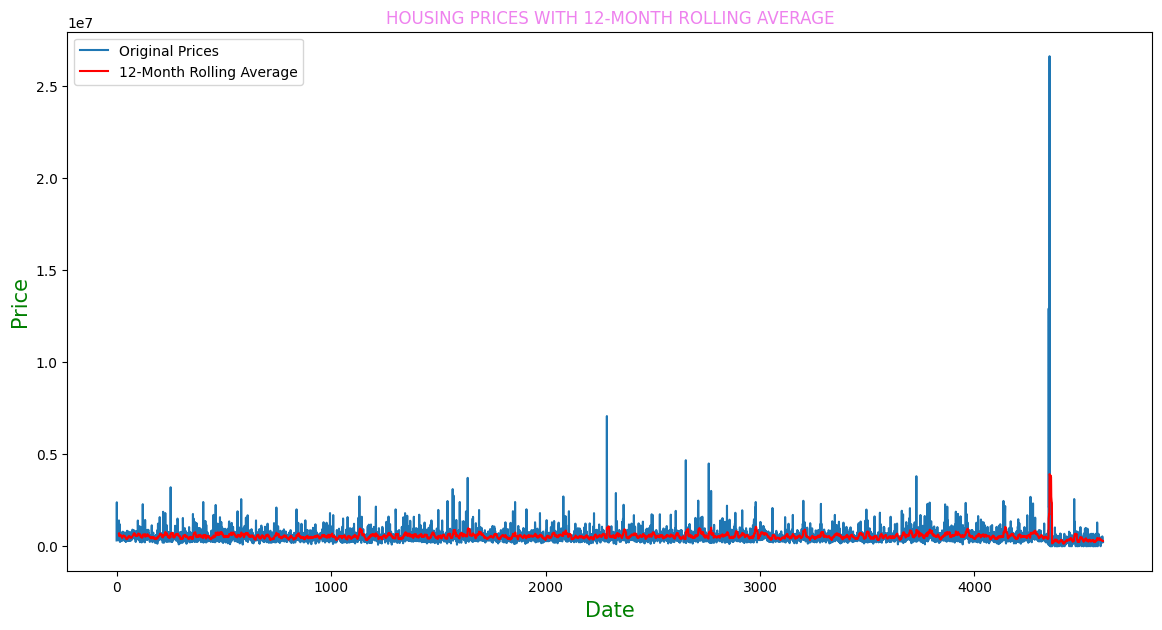

In [ ]:
rolling_avg = df['price'].rolling(window=12).mean()

# Plot original prices and rolling average
plt.figure(figsize=(14, 7))
plt.plot(df['price'], label='Original Prices')
plt.plot(rolling_avg, label='12-Month Rolling Average', color='red')
plt.title('HOUSING PRICES WITH 12-MONTH ROLLING AVERAGE',color='violet')
plt.xlabel('Date',color='green',fontsize=15)
plt.ylabel('Price',color='green',fontsize=15)
plt.legend()
plt.show()

***Yearly Price Distribution***

The histogram plot generating shows the distribution of housing prices for each year, allowing you to compare how price distributions have changed over time.

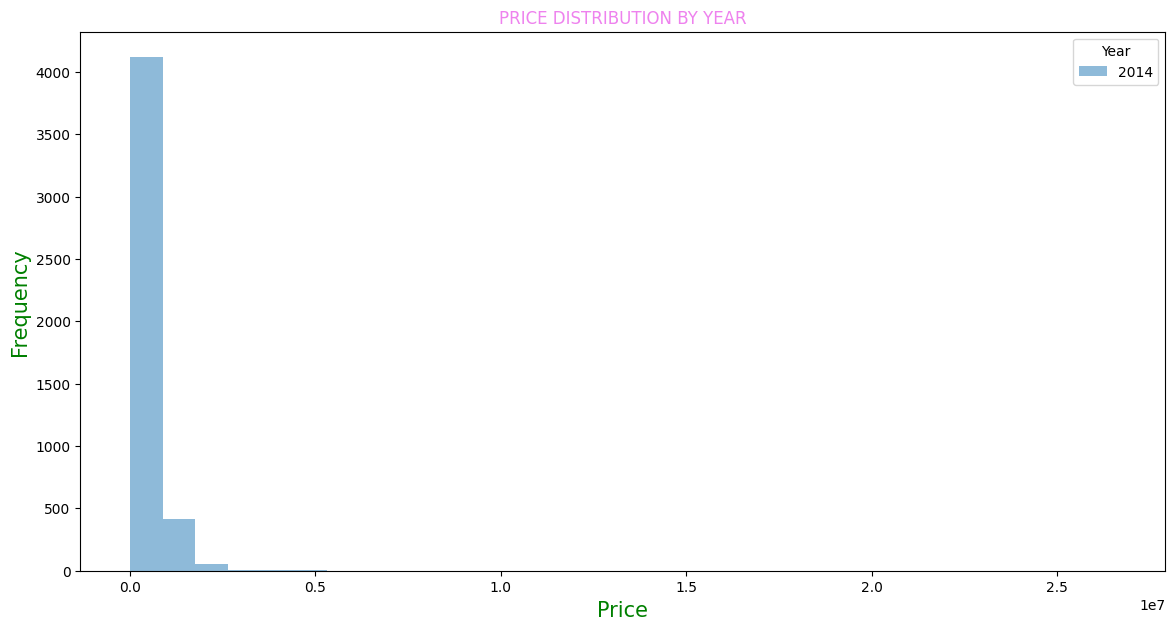

In [ ]:
plt.figure(figsize=(14, 7))
for year in df['year'].unique():
    plt.hist(df[df['year'] == year]['price'], bins=30, alpha=0.5, label=str(year))
plt.title('PRICE DISTRIBUTION BY YEAR',color='violet')
plt.xlabel('Price',color='green',fontsize=15)
plt.ylabel('Frequency',color='green',fontsize=15)
plt.legend(title='Year')
plt.show()

***Distribution of Numerical Features***

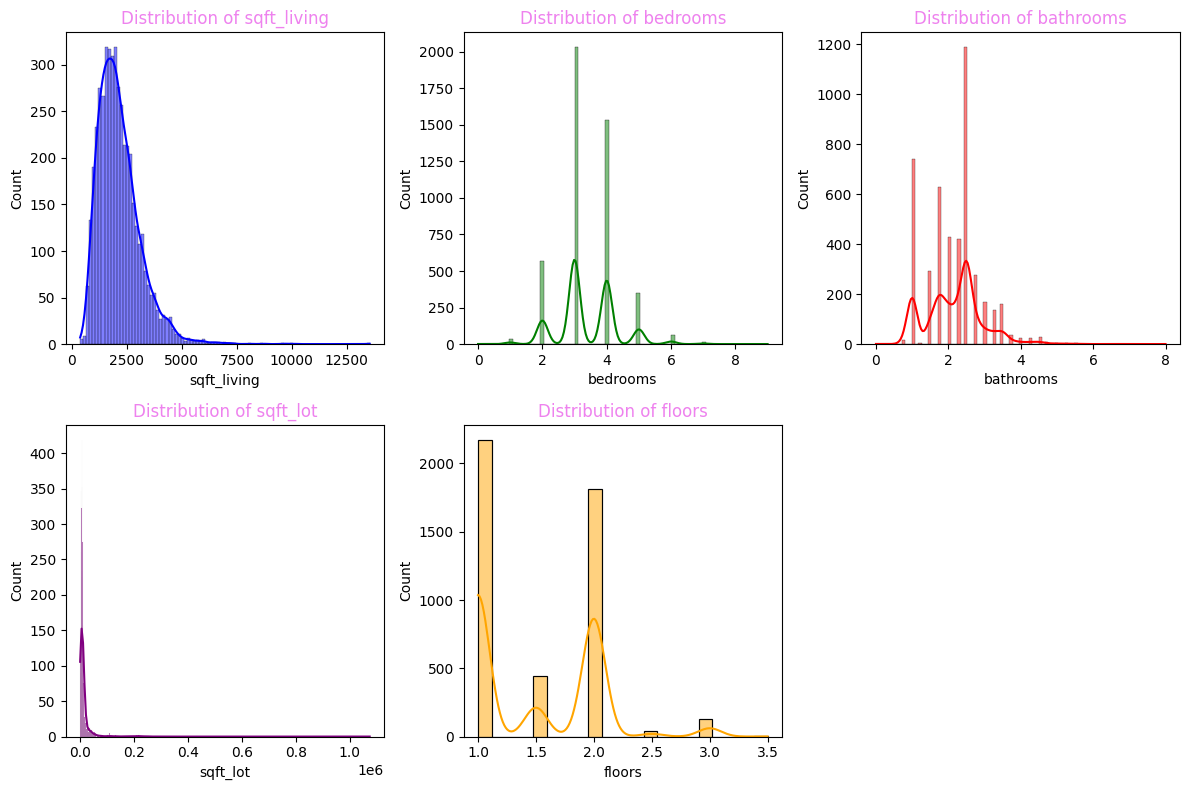

In [ ]:
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.figure(figsize=(12, 8))
for i,( feature,colors) in enumerate(zip(['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors'],colors)):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True,color=colors)
    plt.title(f'Distribution of {feature}',color='violet')
plt.tight_layout()
plt.show()

***Average Price By Number Of Bedrooms***

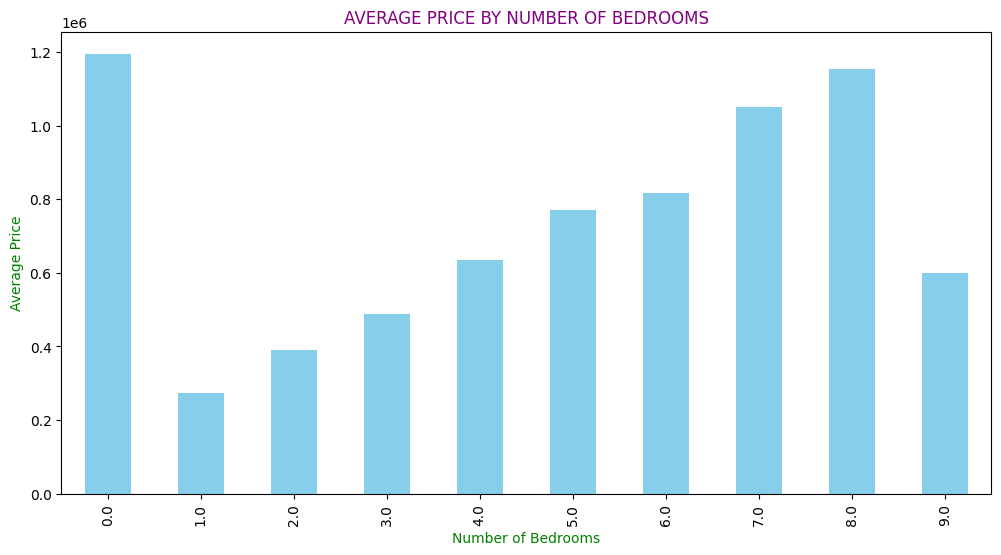

In [ ]:
plt.figure(figsize=(12, 6))
avg_price_by_bedrooms = df.groupby('bedrooms')['price'].mean().sort_index()
avg_price_by_bedrooms.plot(kind='bar')
ax = avg_price_by_bedrooms.plot(kind='bar', color='skyblue')
plt.title('AVERAGE PRICE BY NUMBER OF BEDROOMS',color='purple')
plt.xlabel('Number of Bedrooms',color='green')
plt.ylabel('Average Price',color='green')
plt.show()

***SCATTER PLOTS***

***a] Price vs. Sqft Living***

To explore the relationship between house price and the size of the house.


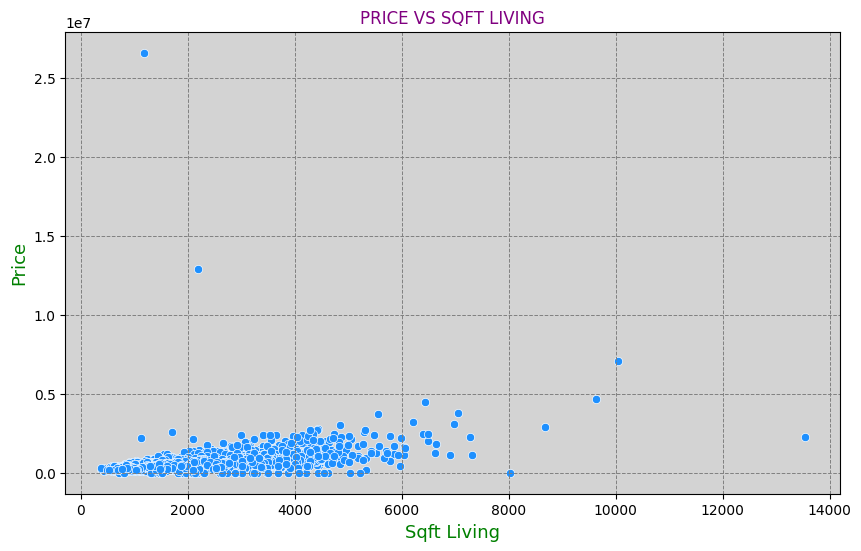

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df,color='dodgerblue')
plt.title('PRICE VS SQFT LIVING',color='purple')
plt.xlabel('Sqft Living',color='green',fontsize=13)
plt.ylabel('Price',color='green',fontsize=13)
plt.grid(True, linestyle='--', linewidth=0.7, color='grey')
plt.gca().set_facecolor('lightgrey')
plt.show()

***b] Price vs. Year Built***

To analyze how house prices have changed with the age of the house.

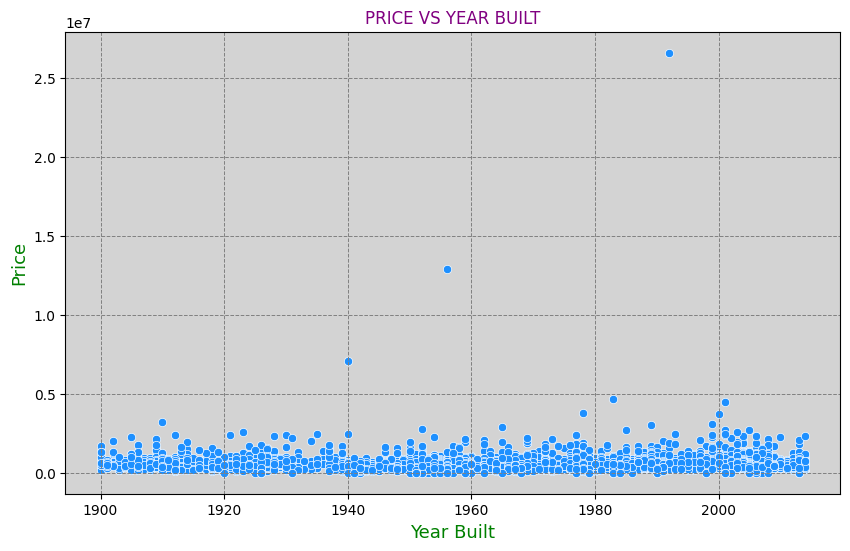

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yr_built', y='price', data=df,color='dodgerblue')
plt.title('PRICE VS YEAR BUILT',color='purple')
plt.xlabel('Year Built',color='green',fontsize=13)
plt.ylabel('Price',color='green',fontsize=13)
plt.grid(True, linestyle='--', linewidth=0.7, color='grey')
plt.gca().set_facecolor('lightgrey')
plt.show()

***PAIR PLOTS***

To visualize the relationships between multiple features.


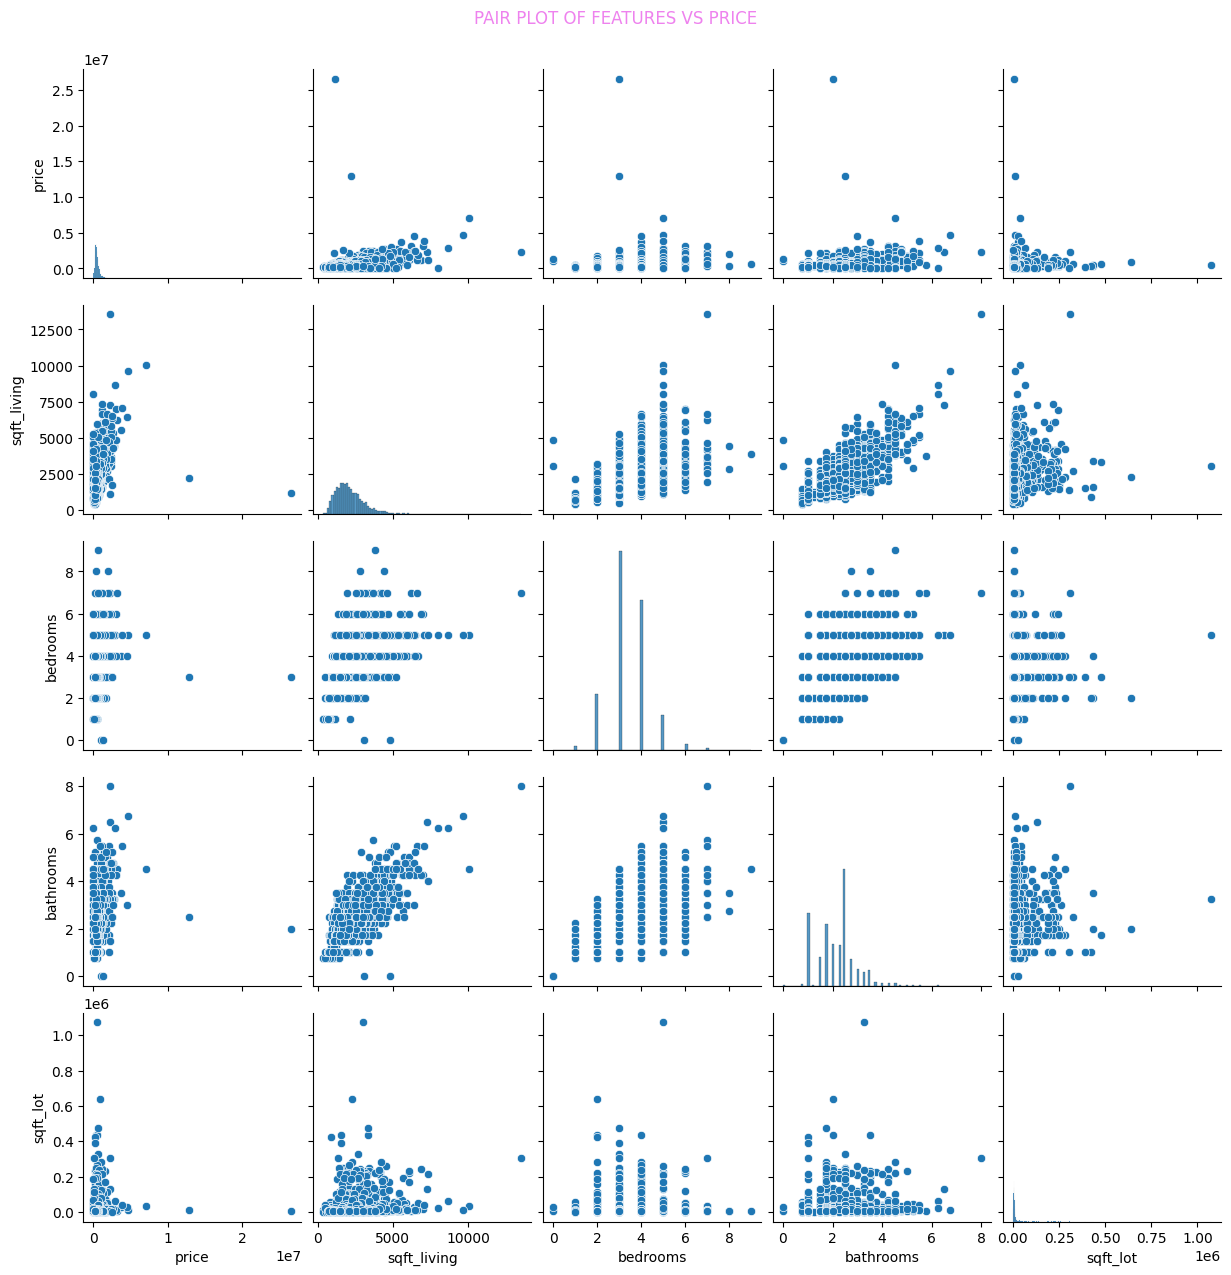

In [ ]:
sns.pairplot(df[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']])
plt.suptitle('PAIR PLOT OF FEATURES VS PRICE',color='violet', y=1.02)
plt.show()

***BAR PLOTS***

***a. Average Price by City***


To see how average house prices differ by city.

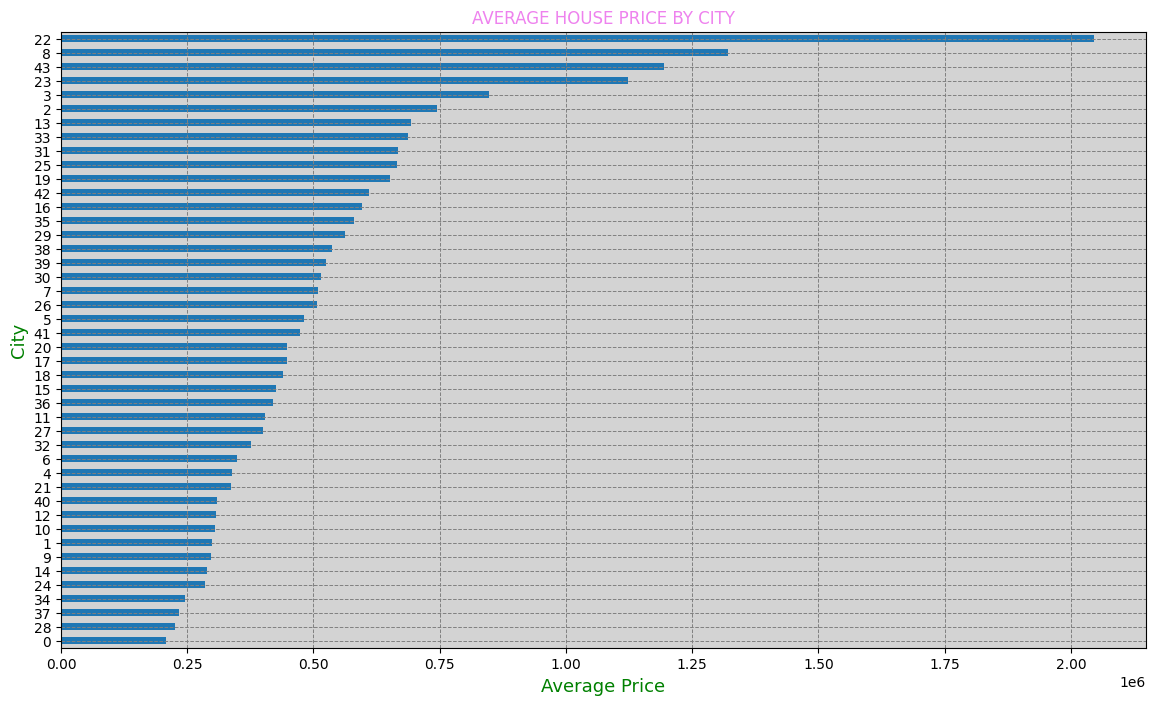

In [ ]:
plt.figure(figsize=(14, 8))
city_avg_price = df.groupby('city')['price'].mean().sort_values()
ax = city_avg_price.plot(kind='barh', color='green')
city_avg_price.plot(kind='barh')
plt.title('AVERAGE HOUSE PRICE BY CITY',color='violet')
plt.xlabel('Average Price',color='green',fontsize=13)
plt.ylabel('City',color='green',fontsize=13)
ax.grid(True, linestyle='--', linewidth=0.7, color='grey')
plt.gca().set_facecolor('lightgrey')
plt.show()

***b. Count of Houses by Condition***

To see how many houses fall into different condition categories.

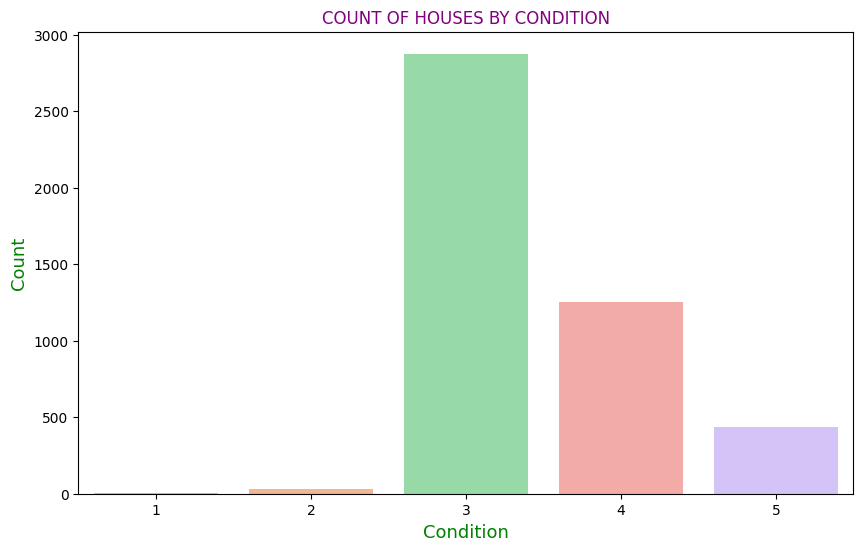

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=df,palette='pastel')
plt.title('COUNT OF HOUSES BY CONDITION',color='purple')
plt.xlabel('Condition',color='green',fontsize=13)
plt.ylabel('Count',color='green',fontsize=13)
plt.show()

***REMOVAL OF OUTLIERS USING IQR***

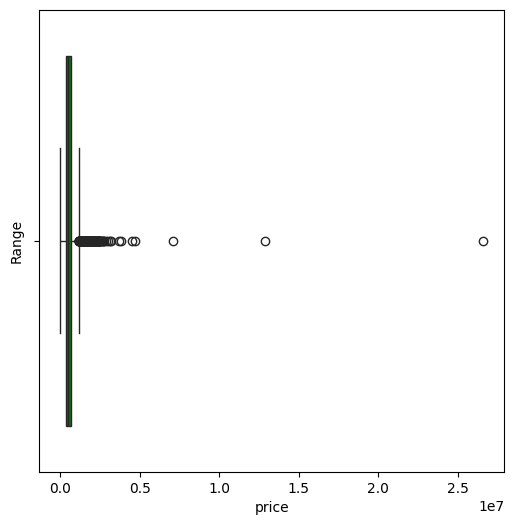

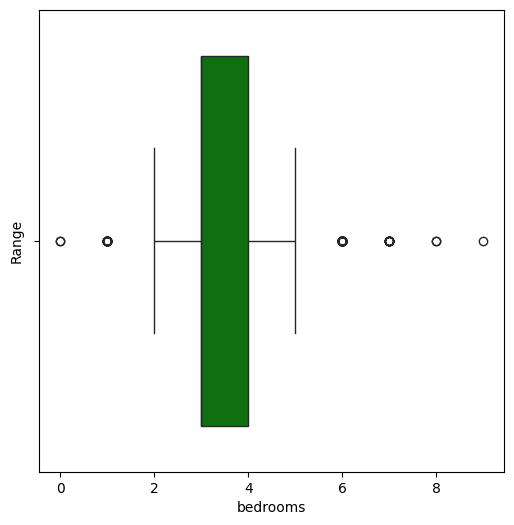

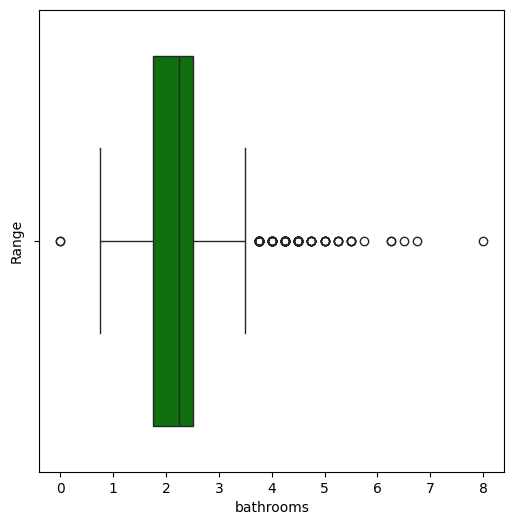

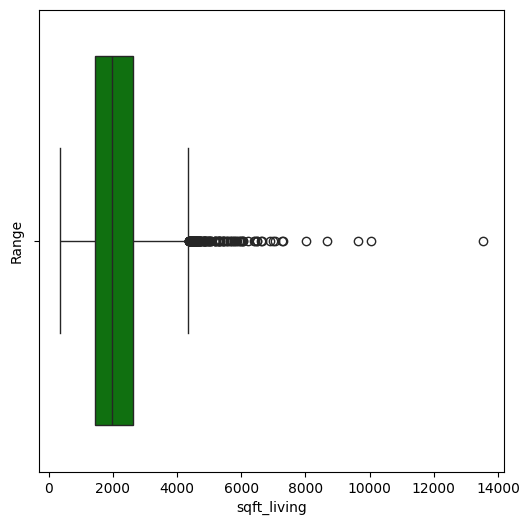

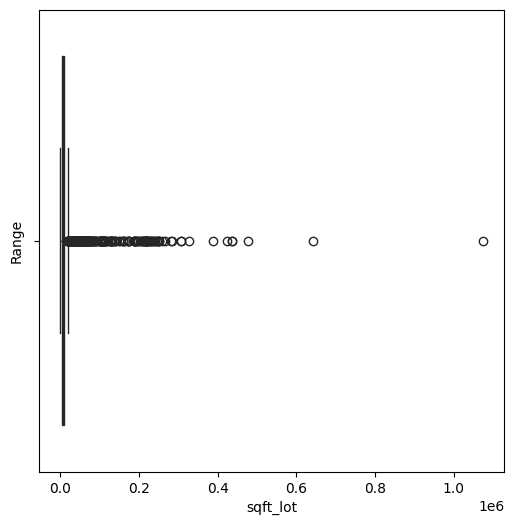

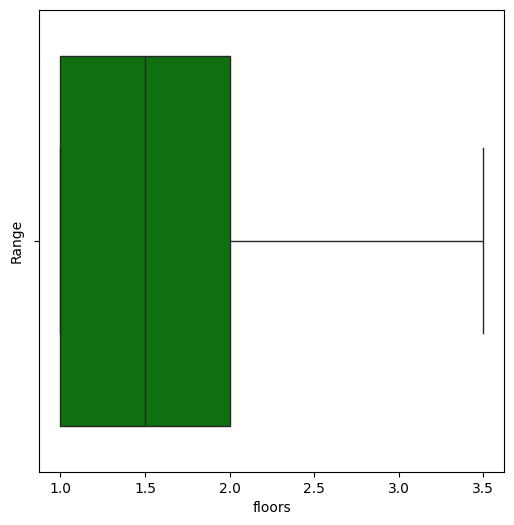

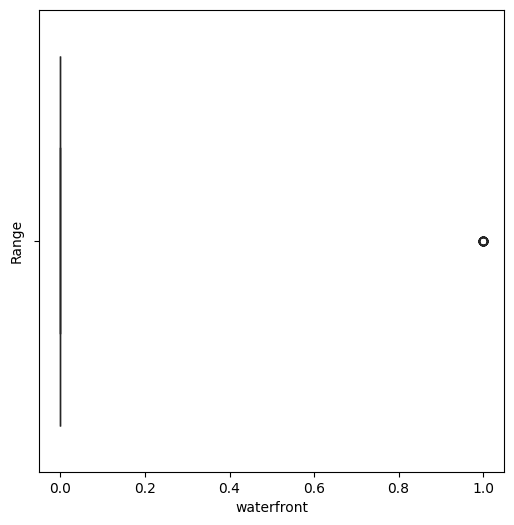

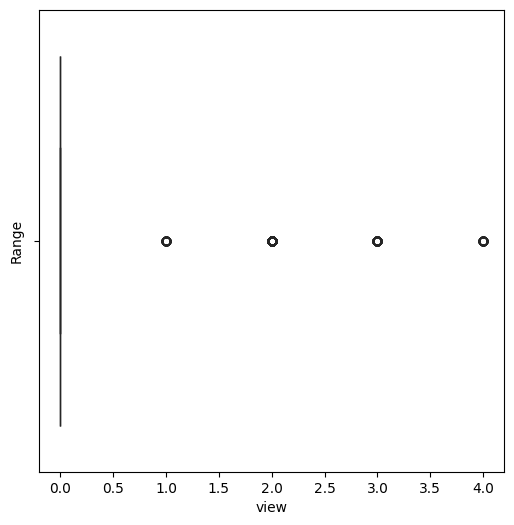

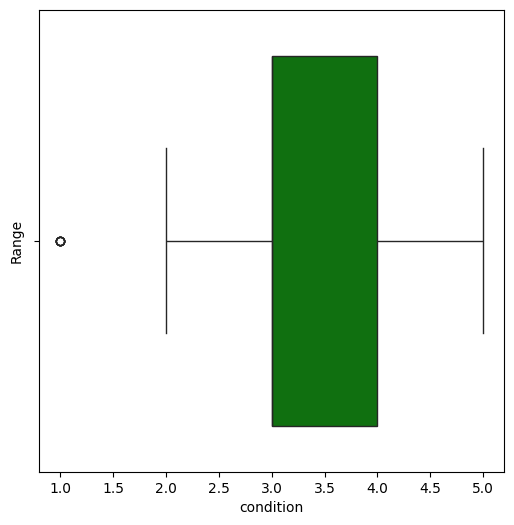

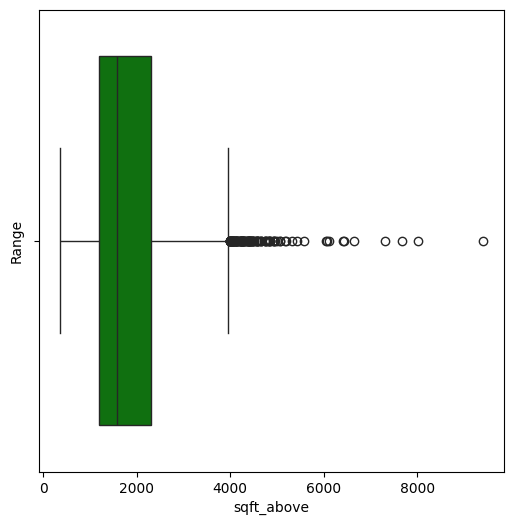

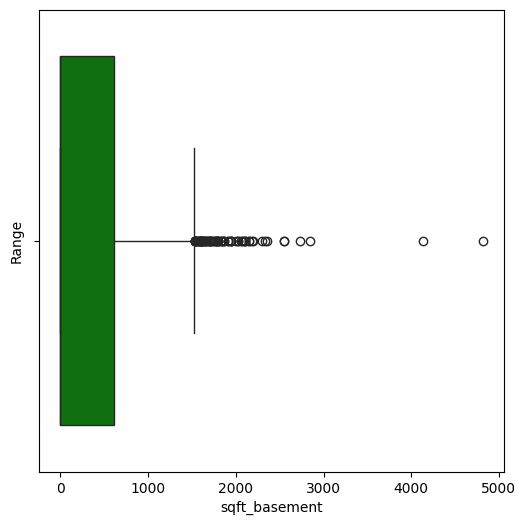

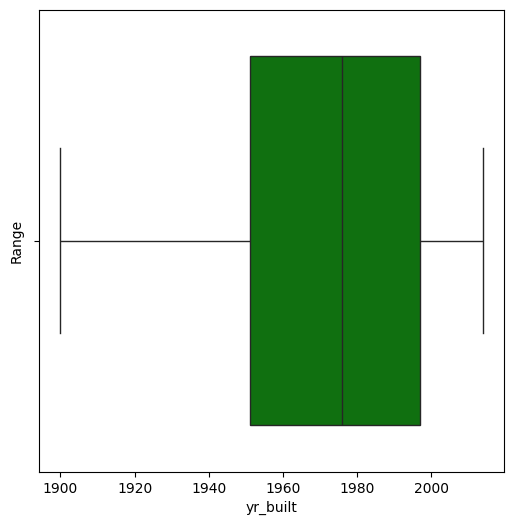

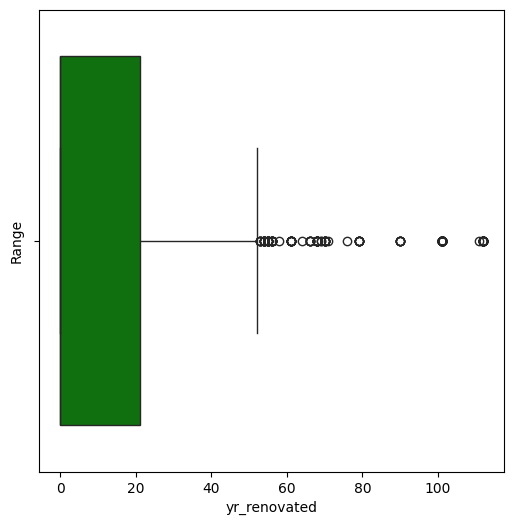

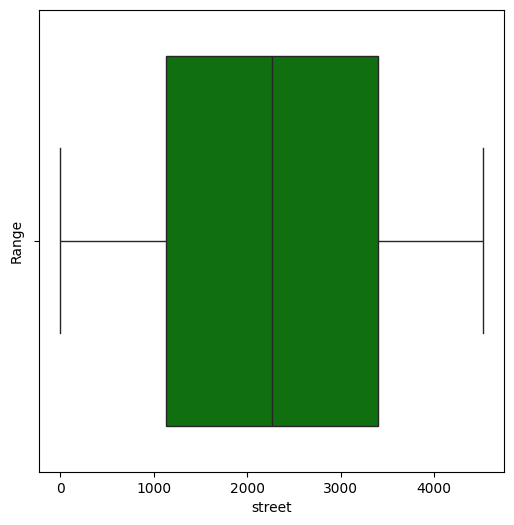

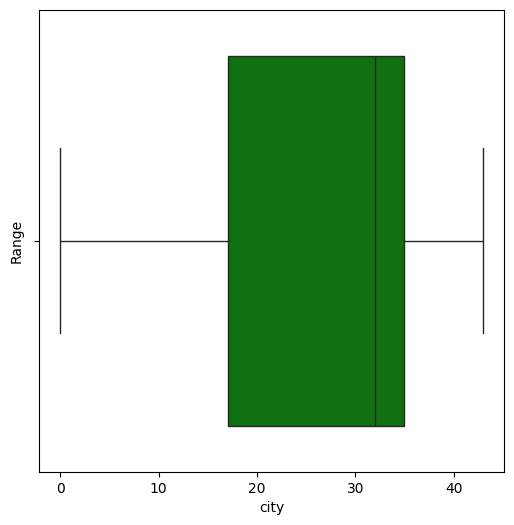

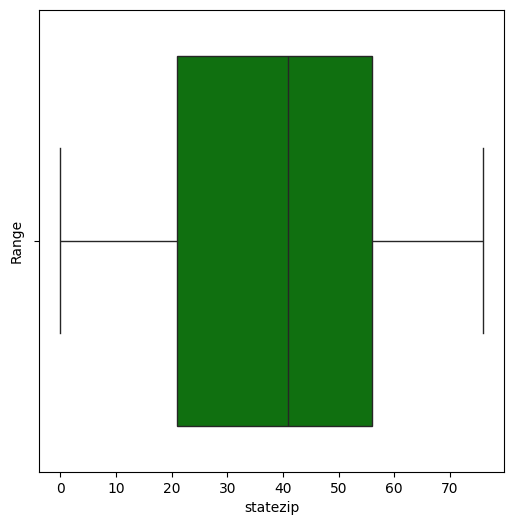

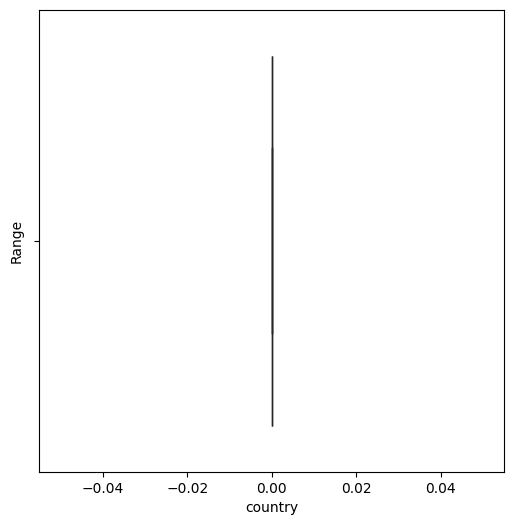

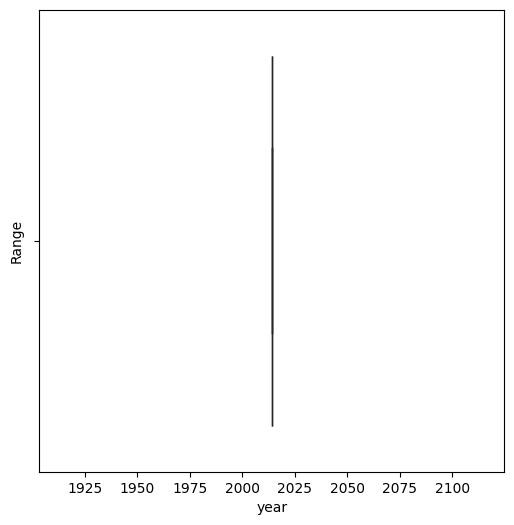

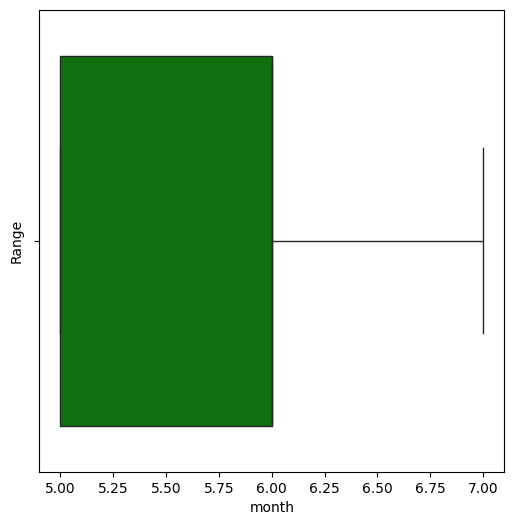

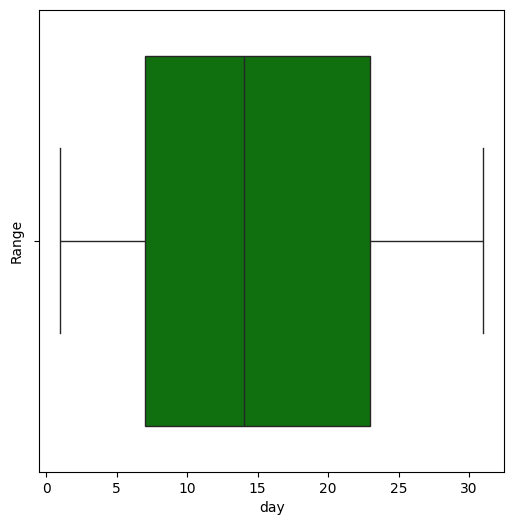

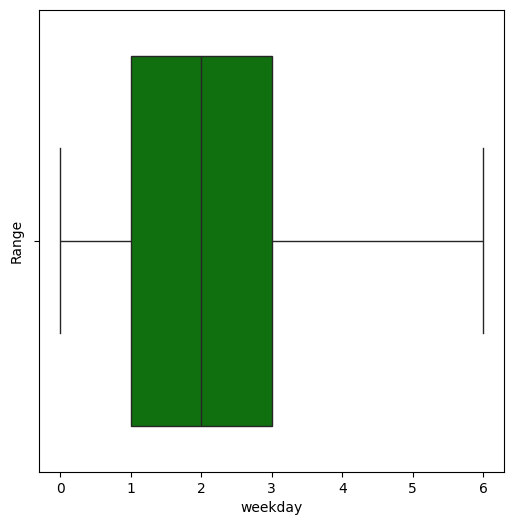

In [ ]:
for i in df:
  plt.figure(figsize=(6,6))
  sns.boxplot(x=df[i],color='green')
  plt.ylabel('Range')
  plt.show()

In [ ]:
q1=df.quantile(0.25)
q2=df.quantile(0.75)
IQR=q2-q1
max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

In [ ]:
df=pd.DataFrame(np.where(df>max_limit,max_limit,(np.where(df<min_limit,min_limit,df))),columns=df.columns)

***Collecting Input and Output Data***

In [ ]:
x=df.drop(['price'],axis=1).values
x

array([[3.00e+00, 1.50e+00, 1.34e+03, ..., 5.00e+00, 2.00e+00, 4.00e+00],
       [5.00e+00, 2.50e+00, 3.65e+03, ..., 5.00e+00, 2.00e+00, 4.00e+00],
       [3.00e+00, 2.00e+00, 1.93e+03, ..., 5.00e+00, 2.00e+00, 4.00e+00],
       ...,
       [3.00e+00, 2.50e+00, 3.01e+03, ..., 7.00e+00, 9.00e+00, 2.00e+00],
       [4.00e+00, 2.00e+00, 2.09e+03, ..., 7.00e+00, 1.00e+01, 3.00e+00],
       [3.00e+00, 2.50e+00, 1.49e+03, ..., 7.00e+00, 1.00e+01, 3.00e+00]])

In [ ]:
y=df['price'].values
y

array([ 313000.      , 1153093.75    ,  342000.      , ...,
        416904.166667,  203400.      ,  220600.      ])

***Splitting Data into Training and Testing***

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.03,random_state=42)


In [ ]:
x_train

array([[3.00e+00, 2.50e+00, 2.49e+03, ..., 5.00e+00, 5.00e+00, 0.00e+00],
       [4.00e+00, 2.50e+00, 3.03e+03, ..., 5.00e+00, 2.20e+01, 3.00e+00],
       [2.00e+00, 1.00e+00, 9.20e+02, ..., 5.00e+00, 2.70e+01, 1.00e+00],
       ...,
       [3.00e+00, 1.00e+00, 1.15e+03, ..., 6.00e+00, 2.30e+01, 0.00e+00],
       [2.00e+00, 1.00e+00, 9.10e+02, ..., 7.00e+00, 1.00e+00, 1.00e+00],
       [2.00e+00, 1.00e+00, 1.49e+03, ..., 5.00e+00, 1.90e+01, 0.00e+00]])

In [ ]:
x_test

array([[3.00e+00, 2.50e+00, 1.46e+03, ..., 6.00e+00, 3.00e+01, 0.00e+00],
       [5.00e+00, 2.25e+00, 2.00e+03, ..., 5.00e+00, 2.20e+01, 3.00e+00],
       [3.00e+00, 3.25e+00, 2.94e+03, ..., 6.00e+00, 1.60e+01, 0.00e+00],
       ...,
       [3.00e+00, 2.00e+00, 1.59e+03, ..., 6.00e+00, 1.60e+01, 0.00e+00],
       [2.00e+00, 1.00e+00, 1.08e+03, ..., 5.00e+00, 2.80e+01, 2.00e+00],
       [2.00e+00, 1.00e+00, 8.20e+02, ..., 6.00e+00, 4.00e+00, 2.00e+00]])

In [ ]:
y_train

array([ 705380., 1050000.,  427000., ...,  290000.,  600000.,  475000.])

In [ ]:
y_test

array([ 544000.      ,       0.      , 1153093.75    ,  365000.      ,
        275000.      ,  625000.      ,  453000.      ,  300000.      ,
        417985.714286,  672500.      ,  525000.      ,  500000.      ,
        590000.      ,  305000.      ,  210000.      ,  915000.      ,
        675000.      ,  630000.      , 1153093.75    ,  883000.      ,
       1153093.75    ,  612500.      ,  615000.      ,  590000.      ,
        301500.      ,   87500.      ,  746000.      ,  950100.      ,
        415000.      ,  775000.      , 1153093.75    ,  253000.      ,
       1153093.75    ,  312891.      ,  252000.      ,  325000.      ,
        455000.      ,  540000.      ,  215000.      ,  653000.      ,
        306000.      ,  435000.      ,  335000.      ,  610000.      ,
        245000.      ,  365000.      ,  260000.      ,  615000.      ,
       1153093.75    ,  835000.      ,  490000.      ,  482000.      ,
        530000.      ,  550000.      ,  170000.      ,  615000.      ,
      

***MODEL CREATION***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
lr=LinearRegression()
tree=DecisionTreeRegressor()
forest=RandomForestRegressor(max_depth=25, random_state=100)
gradient=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lst=[lr,tree,forest,gradient]
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for i in lst:
  i.fit(x_train,y_train)
  y_predict=i.predict(x_test)
  print("model is",i)
  print("percentage erreor is",mean_absolute_percentage_error(y_test,y_predict))
  print("r2score is",r2_score(y_test,y_predict))
  print()

model is LinearRegression()
percentage erreor is 6.814174583493553e+19
r2score is 0.40538295759114373

model is DecisionTreeRegressor()
percentage erreor is 7.476607680295751e+19
r2score is 0.2588082586235473

model is RandomForestRegressor(max_depth=25, random_state=100)
percentage erreor is 6.5640996980385096e+19
r2score is 0.6102443523008086

model is GradientBoostingRegressor(random_state=42)
percentage erreor is 6.703162279395433e+19
r2score is 0.616488651598616



***MODEL PERFORMANCE***

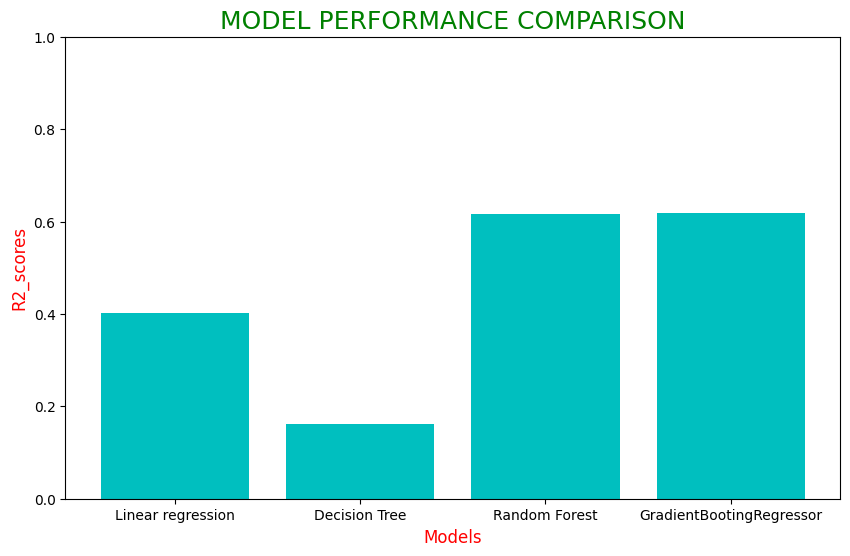

In [ ]:
models = ['Linear regression','Decision Tree','Random Forest','GradientBootingRegressor']
R2_scores = [0.403,0.161,0.617,0.618]

plt.figure(figsize=(10, 6))
plt.bar(models, R2_scores, color='c')

plt.xlabel('Models',color='red',fontsize=12)
plt.ylabel('R2_scores',color='red',fontsize=12)
plt.title('MODEL PERFORMANCE COMPARISON',color='green',fontsize=18)
plt.ylim([0, 1])

plt.show()

***Model Performance: Actual vs. Predicted Values and Errors***

In [ ]:
df1=pd.DataFrame({"Actual value":y_test,"Predicted vale":y_predict,"error":y_test-y_predict})
df1

,Actual value,Predicted vale,error
0,544000.00,465491.188410,78508.811590
1,0.00,288733.685036,-288733.685036
2,1153093.75,886089.570137,267004.179863
3,365000.00,476584.543255,-111584.543255
4,275000.00,266155.015844,8844.984156
...,...,...,...
133,345000.00,441266.608266,-96266.608266
134,718000.00,421883.776878,296116.223122
135,385000.00,411584.237988,-26584.237988
136,345000.00,418078.415980,-73078.415980


In [ ]:
print("slope is")
list(zip(x,lr.coef_))

slope is


[(array([3.000e+00, 1.500e+00, 1.340e+03, 7.912e+03, 1.500e+00, 0.000e+00,
         0.000e+00, 3.000e+00, 1.340e+03, 0.000e+00, 1.955e+03, 1.900e+01,
         1.522e+03, 3.600e+01, 6.200e+01, 0.000e+00, 2.014e+03, 5.000e+00,
         2.000e+00, 4.000e+00]),
  -41305.89877856082),
 (array([5.000e+00, 2.500e+00, 3.650e+03, 9.050e+03, 2.000e+00, 0.000e+00,
         0.000e+00, 5.000e+00, 3.370e+03, 2.800e+02, 1.921e+03, 0.000e+00,
         3.899e+03, 3.500e+01, 5.800e+01, 0.000e+00, 2.014e+03, 5.000e+00,
         2.000e+00, 4.000e+00]),
  43852.5219211421),
 (array([3.0000e+00, 2.0000e+00, 1.9300e+03, 1.1947e+04, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 4.0000e+00, 1.9300e+03, 0.0000e+00,
         1.9660e+03, 0.0000e+00, 2.2910e+03, 1.8000e+01, 2.6000e+01,
         0.0000e+00, 2.0140e+03, 5.0000e+00, 2.0000e+00, 4.0000e+00]),
  160.66330248790075),
 (array([3.000e+00, 2.250e+00, 2.000e+03, 8.030e+03, 1.000e+00, 0.000e+00,
         0.000e+00, 4.000e+00, 1.000e+03, 1.000e+03, 1.963e+03, 

In [ ]:
print("constant is",lr.intercept_)

constant is 3951190.0785895595


***HYPERPARAMETER TUNNING USING GRIDSEARCHCV***

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
paramater_grid = {
     'n_estimators': [100, 200],
     'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
   'min_samples_split': [2, 5],
     'min_samples_leaf': [1, 2],
     'max_features': [None, 'sqrt'] }

In [ ]:
gradientboost = GradientBoostingRegressor()

In [ ]:
grid_search = GridSearchCV(estimator=gradientboost, param_grid=paramater_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


***Model Creation Using GradientBoost Regressor***

In [ ]:
gradientboost=GradientBoostingRegressor(n_estimators=200,max_depth=4,min_samples_leaf=2,min_samples_split=5,learning_rate= 0.1,max_features=None)
gradientboost.fit(x_train,y_train)
y_predict1=gradientboost.predict(x_test)
y_predict1

array([ 448997.60903117,  254740.04603268,  958824.51668987,
        439056.2946162 ,  251075.10549003,  606947.93192394,
        493118.83436188,  343535.76083545,  494574.11653616,
        769763.35612034,  561052.68824439,  432741.33157879,
        797933.51129492,  331490.98449966,  275596.27952973,
        758681.26802849,  685796.6293346 ,  592152.25102621,
        994208.08357152,  762167.85926673,  744060.02079974,
        569001.38790905,  613521.48581875,  511590.19703418,
        311162.22690989,  165713.96155505,  791504.58897347,
       1040212.95951885,  440349.52204524,  719404.78384155,
       1111009.2301124 ,  325999.23592513,  974045.9666479 ,
        279350.75209954,  423214.06922866,  449688.56645416,
        570354.57173391,  475592.38072293,  220773.73117468,
        548510.67733339,  336021.36026841,  412575.40371463,
        344084.47035449,  579078.62111128,  245585.50472173,
        338449.11090749,  296488.57719421,  644814.04649789,
        970011.78472027,

In [ ]:
print("r2_score is",r2_score(y_test,y_predict1))

r2_score is 0.6628396102395013


The increase in the
R
2
  score from 0.61 to 0.66 shows a meaningful gain in model accuracy, highlighting the effectiveness of hyperparameter tuning in refining the Gradient Boosting Regressor.The improvement, though modest, reflects a positive step towards more accurate predictions. It demonstrates that the hyperparameter tuning process has successfully optimized the model's performance by adjusting parameters to better fit the data.

***Predicting Random Output***

In [ ]:
random_input = np.array([[4,2.50,1940	,10500,1,0,0,4,1140,800,1976,32,4352,31,31,0,2014,7,9,2]])
gradientboost.fit(x_train,y_train)
predicted_value = gradientboost.predict(random_input)
print("Predicted output is",predicted_value)

Predicted output is [502878.07019695]


***CONCLUSION***

The conclusion drawn from house price predictions typically revolves around market trends and investment opportunities. If predictions indicate rising prices, it suggests a strong demand or limited supply, potentially signaling a good time for buying or investing. Conversely, if prices are predicted to fall,it might indicate a weakening market, suggesting caustion for buyers and possibly a good time for investors to wait. These predictions help stakeholders make informed decisions based on anticipated market conditions.